# Layer Tuning

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import kerastuner as kt # for tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_17072\3655248104.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt # for tuning


In [2]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

In [3]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(72,activation = 'relu', input_dim =  8))
    for i in range(hp.Int('num_layers',min_value = 1,max_value = 10)):
        
        model.add(Dense(72,activation = 'relu',))
    
    model.add(Dense(1,activation = 'sigmoid'))

    model.compile(optimizer = 'rmsprop',loss= 'binary_crossentropy',metrics = ['accuracy'])

    return model


In [4]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',
    max_trials=3,
    directory = 'tuner',
    project_name = 'NUmlayerTuner'

)

In [5]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.6875

Best val_accuracy So Far: 0.6875
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [6]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9}

In [7]:
model = tuner.get_best_models(num_models=1)[0]
model

In [8]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
18/18 [==============================] - 2s 20ms/step - loss: 0.6206 - accuracy: 0.6701 - val_loss: 0.6165 - val_accuracy: 0.6875
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6171 - accuracy: 0.6337 - val_loss: 0.6272 - val_accuracy: 0.6927
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6133 - accuracy: 0.6788 - val_loss: 0.6140 - val_accuracy: 0.6979
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.6944 - val_loss: 0.6312 - val_accuracy: 0.6667
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6093 - accuracy: 0.6753 - val_loss: 0.6353 - val_accuracy: 0.6771
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5841 - accuracy: 0.6997 - val_loss: 0.6493 - val_accuracy: 0.6458
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.6875 - val_loss: 0.6160 - val_accuracy: 0.6719
Epoch 14

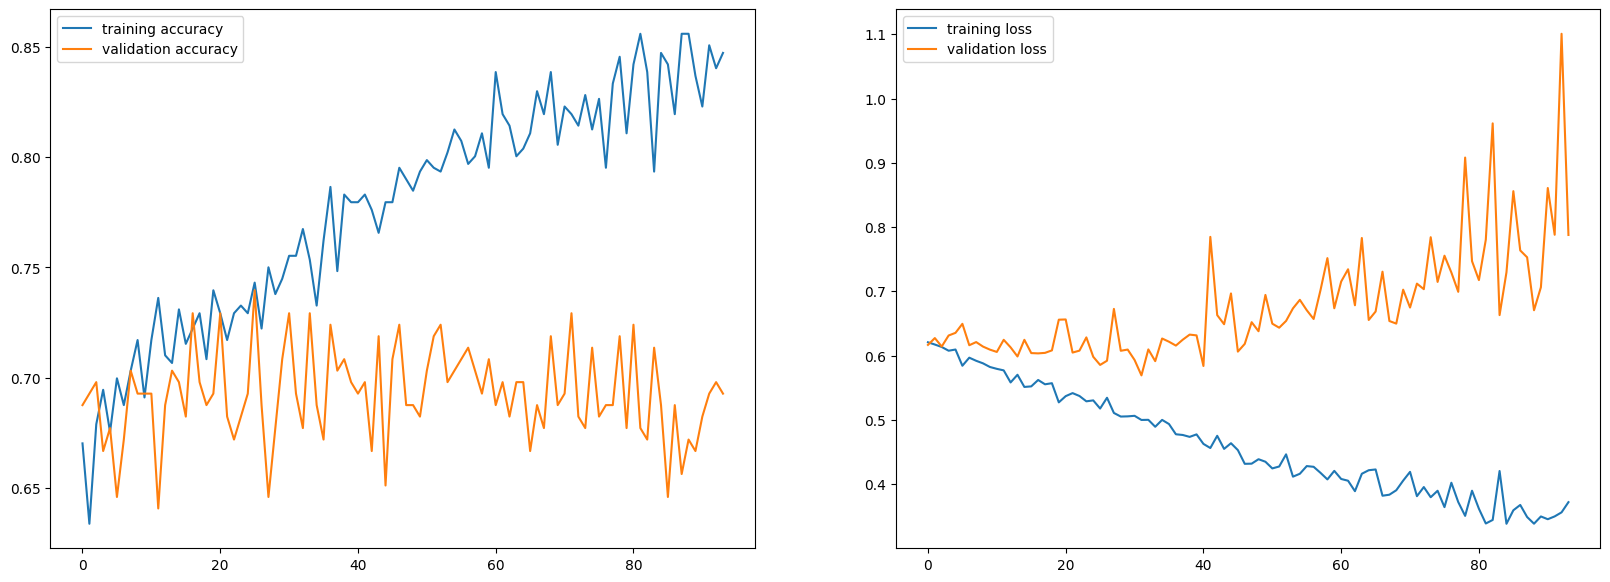

In [9]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
